# Классификация клиентов банка - прогнозирование оттока

## Постановка задачи
Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт ли клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

<i>Примечание</i>: такого банка в реальности не существует. Данные о его клиентах вымышлены (синтезированы).

Данная задача была предложена в рамках курса Университета Национальной Технологической Инициативы (НТИ) 2035 
https://edu.2035.university/course/UNIVERSITY2035/II2020_5/

### В каком виде хранятся исходные данные?

Обычно в задаче анализа данных имеется некоторая прямоугольная таблица. Ее строки соответствуют объектам, а столбцы – признакам этих объектов. Объекты также называются наблюдениями или примерами (samples), а признаки – атрибутами (features).

Признаки бывают количественными (как, например, доход в рублях или рост в сантиметрах и т.д.) или категориальными (как, например, марка автомобиля, модель телефона и т.д.).

Один из признаков (столбцов) выделен. Этот признак называется ответом. Остальные признаки – входные. Требуется по имеющейся таблице научиться по новому объекту, которого нет в таблице, но для которого известны значения входных признаков, по возможности с небольшой ошибкой предсказывать значение выделенного признака (ответа).

Если ответ количественный, то задача называется задачей восстановления регрессии. Если ответ категориальный, то задача называется задачей классификации.

Взято из руководства https://mlbootcamp.ru/ru/article/tutorial/

### Описание данных

Признаки:
- RowNumber – индекс строки в данных
- CustomerId – уникальный идентификатор клиента
- Surname – фамилия
- CreditScore – кредитный рейтинг
- Geography – страна проживания
- Gender – пол
- Age – возраст
- Tenure – количество недвижимости у клиента
- Balance – баланс на счёте
- NumOfProducts -количество продуктов банка, используемых клиентом
- HasCrCard – наличие кредитной карты
- IsActiveMember – активность клиента
- EstimatedSalary – предполагаемая зарплата

Целевой (искомый) признак:
- Exited – факт ухода клиента

## Стадии решения задачи
- подключение модулей (import modules)
- загрузка данных (data lodaing)
- разведочный анализ данных (exploratory data analysis, EDA)
- предварительная обработка данных (preprocessing)
- обучение моделей (models fitting)
- прогнозирование (prediction)

## Подключение модулей

Для решения задачи анализа данных воспользуемся библиотеками numpy, pandas и scikit-learn. Библиотека numpy содержит реализации многомерных массивов и алгоритмов линейной алгебры. Библиотека pandas предоставляет широкий спектр функций по обработке табличных данных. Библиотека scikit-learn реализует множество алгоритмов машинного обучения. Кроме того, нам понадобится библиотека matplotlib для научной визуализации.

Наиболее простой способ получить все требуемые библиотеки в python – установить дистрибутив anaconda

In [ ]:
# импортируем необходимые модули
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка данных

In [ ]:
# загружаем данные из файла в формате CSV, указываем символ-разделитель и сохраняем данные в дата-фрейм (переменную df)
df = pd.read_csv('Churn_Modelling.csv', sep = ';')

In [ ]:
# проверяем, что данные загрузились - выводим первые несколько строк таблицы
df.head(10)

## Разведочный анализ данных (РАД, EDA)

На какие вопросы может дать ответы РАД?
- сколько у нас данных? (кол-во объектов и их признаков)
- какие типы данных имеют признаки?
- какой признак является целевым (target)? С какой задачей мы имеем дело? (классификация или регрессия)
- сколько значений пропущено в различных колонках?
- какова статистика распределения значений признаков? Есть ли выбросы (аномальные наблюдения)?
- как признаки соотносятся между собой (коррелируют, влияют друг на друга)? Как признаки влияют на целевой признак?
- для задач классификации: сколько у нас классов - два или больше? Сбалансированы ли классы?
- и др.

В зависимости от формы представления результатов РАД можно разделить на:
- числовой/табличный анализ
- визуальный (графический) анализ

В зависимости от кол-ва одновременно исследуемых признаков РАД можно разделить на:
- одномерный анализ (univariate analysis) - исследование каждого признака в отдельности
- двумерный анализ (bivariate analysis) - исследование взаимного влияния признаков и сравнение их характеристик
- многомерный анализ (multivariate analysis) - сравнение статистических характеристик нескольких признаков 

In [ ]:
# объём данных (строк и столбцов - объектов и признаков)
df.shape

In [ ]:
# выводим типы данных
df.dtypes

In [ ]:
# целевой признак - Exited

In [ ]:
df.info()

In [ ]:
# имена колонок в виде списка
df.columns

In [ ]:
# сколько пропусков в колонке CreditScore ?
df['CreditScore'].isna().sum()

In [ ]:
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

In [ ]:
# проверка на отсутствующие значения для всех колонок датафрейма
df.isnull().sum()

In [ ]:
# сколько уникальных значений в колонке Geography? 
df['Geography'].nunique()

In [ ]:
# Какие это значения?
df['Geography'].unique()

In [ ]:
# какова статистика распределения этих значений? (сколько каких значений)
df['Geography'].value_counts(normalize=True)

In [ ]:
# исследование целевого (target) признака - факта ухода клиента 
print('кол-во уникальных значений в таргете: ', df['Exited'].nunique())
print('перечень уникальных значений в таргете: ', df['Exited'].unique())
print('статистика распределения значений в таргете: \n', df['Exited'].value_counts(normalize=True))

In [ ]:
# описательная статистика для признака Age
df['Age'].describe()

In [ ]:
# описательная статистика для всех (числовых) признаков
df.describe().T

### Визуальный анализ

In [ ]:
df['Exited'].value_counts(normalize=False).plot.bar()

In [ ]:
df['Geography'].value_counts(normalize=True).plot.pie()

In [ ]:
df['Age'].nunique()

In [ ]:
df['Age'].value_counts(normalize=True).plot.barh()

In [ ]:
# гистаграммы всех признаков
df.hist(figsize=(20,20))

In [ ]:
# гистаграмма для 1 признака
df['Age'].hist()

In [ ]:
# "ящик с усами" (boxplot) для визуализации распределения вероятностей значений признака
df['Age'].plot.box()

In [ ]:
# график плотности распределения признака
df['Age'].plot.density()

In [ ]:
# применяем тему со светлыми линиями сетки
sns.set_theme(style="whitegrid")

# строим диаграмму violin plot ("скрипичная диаграмма")
sns.violinplot(y=df["Age"], inner="quartile")

### Двумерный анализ признаков

In [87]:
# список признаков для анализа
features_eda = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 
                  'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_num']

In [86]:
# создание новой колонки Geography_num и замена символьных значений на целочисленные
df['Geography_num'] = df['Geography']

df['Geography_num'].replace('France', 0, inplace=True)
df['Geography_num'].replace('Spain', 1, inplace=True)
df['Geography_num'].replace('Germany', 2, inplace=True)

In [88]:
# матрица коррелаций
corr = df[features_eda].corr()
corr

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_num
CreditScore,1.000000,0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.008267
Gender,0.002857,1.000000,0.027544,-0.014733,-0.012087,0.021859,-0.005766,-0.022544,0.008112,0.106512,0.016936
Age,-0.003965,0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.048092
Tenure,0.000842,-0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,0.001418
Balance,0.006268,-0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.348700
NumOfProducts,0.012238,0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.006180
HasCrCard,-0.005458,-0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.004036
IsActiveMember,0.025651,-0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.012692
EstimatedSalary,-0.001384,0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.007382
Exited,-0.027094,0.106512,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.153771


<AxesSubplot:>

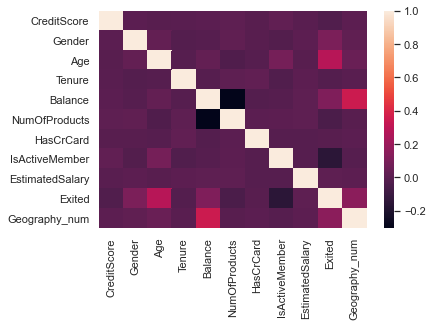

In [89]:
# тепловая карта корреляций между признаками
sns.heatmap(corr)

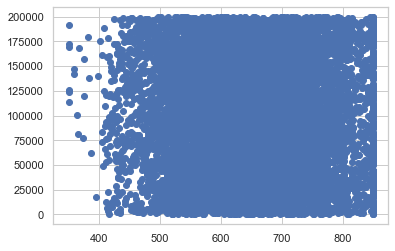

In [90]:
# диаграмма рассеяния для 2х признаков
plt.scatter(df['CreditScore'], df['EstimatedSalary'])

<AxesSubplot:xlabel='CreditScore', ylabel='EstimatedSalary'>

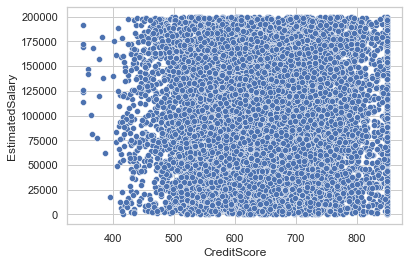

In [91]:
# диаграмма рассеяния для 2х признаков средствами библиотеки seaborn 
sns.scatterplot(data=df, x="CreditScore", y="EstimatedSalary")

<AxesSubplot:xlabel='CreditScore', ylabel='EstimatedSalary'>

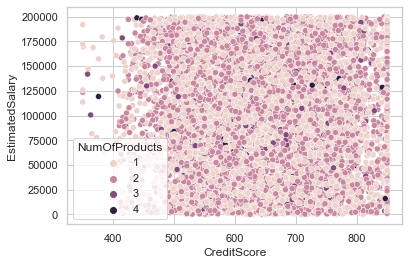

In [95]:
# цвета точек зависят от класса объекта (ушёл клиент или нет)
sns.scatterplot(data=df, x="CreditScore", y="EstimatedSalary", hue="Exited") # , style="Exited"

<AxesSubplot:xlabel='NumOfProducts', ylabel='Balance'>

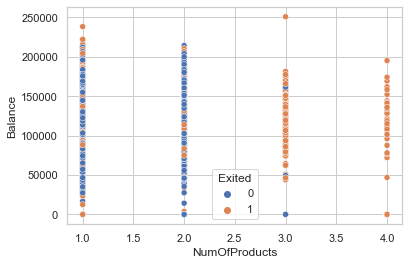

In [96]:
sns.scatterplot(data=df, x="NumOfProducts", y="Balance", hue="Exited") # Exited IsActiveMember HasCrCard 

<AxesSubplot:xlabel='Exited', ylabel='Age'>

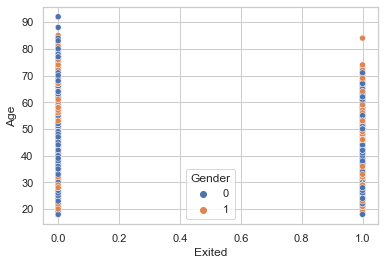

In [97]:
sns.scatterplot(data=df, x="Exited", y="Age", hue="Gender")

<AxesSubplot:xlabel='Geography_num', ylabel='Balance'>

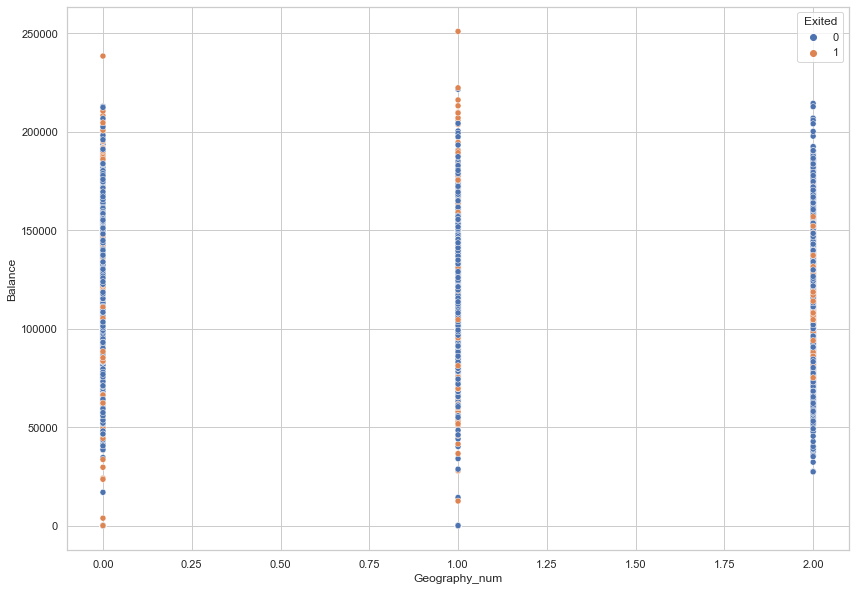

In [100]:
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df, x="Geography_num", y="Balance", hue="Exited")

array([[<AxesSubplot:xlabel='CreditScore', ylabel='CreditScore'>,
        <AxesSubplot:xlabel='Gender', ylabel='CreditScore'>,
        <AxesSubplot:xlabel='Age', ylabel='CreditScore'>,
        <AxesSubplot:xlabel='Tenure', ylabel='CreditScore'>,
        <AxesSubplot:xlabel='Balance', ylabel='CreditScore'>,
        <AxesSubplot:xlabel='NumOfProducts', ylabel='CreditScore'>,
        <AxesSubplot:xlabel='HasCrCard', ylabel='CreditScore'>,
        <AxesSubplot:xlabel='IsActiveMember', ylabel='CreditScore'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='CreditScore'>,
        <AxesSubplot:xlabel='Exited', ylabel='CreditScore'>,
        <AxesSubplot:xlabel='Geography_num', ylabel='CreditScore'>],
       [<AxesSubplot:xlabel='CreditScore', ylabel='Gender'>,
        <AxesSubplot:xlabel='Gender', ylabel='Gender'>,
        <AxesSubplot:xlabel='Age', ylabel='Gender'>,
        <AxesSubplot:xlabel='Tenure', ylabel='Gender'>,
        <AxesSubplot:xlabel='Balance', ylabel='Gender'>,
        

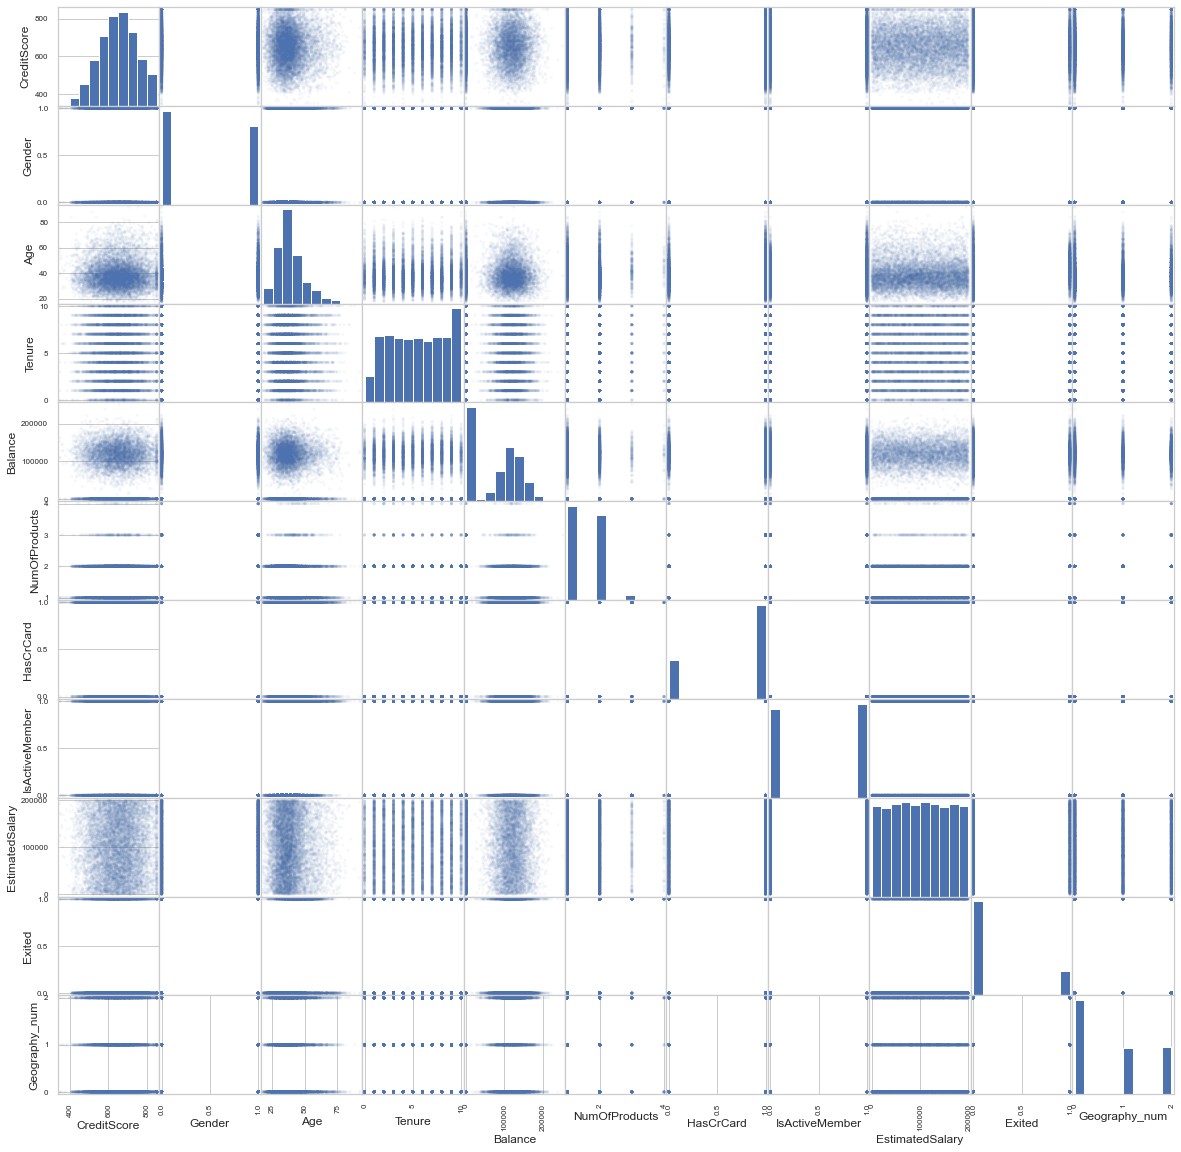

In [101]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[features_eda], alpha=0.05, figsize=(20, 20))

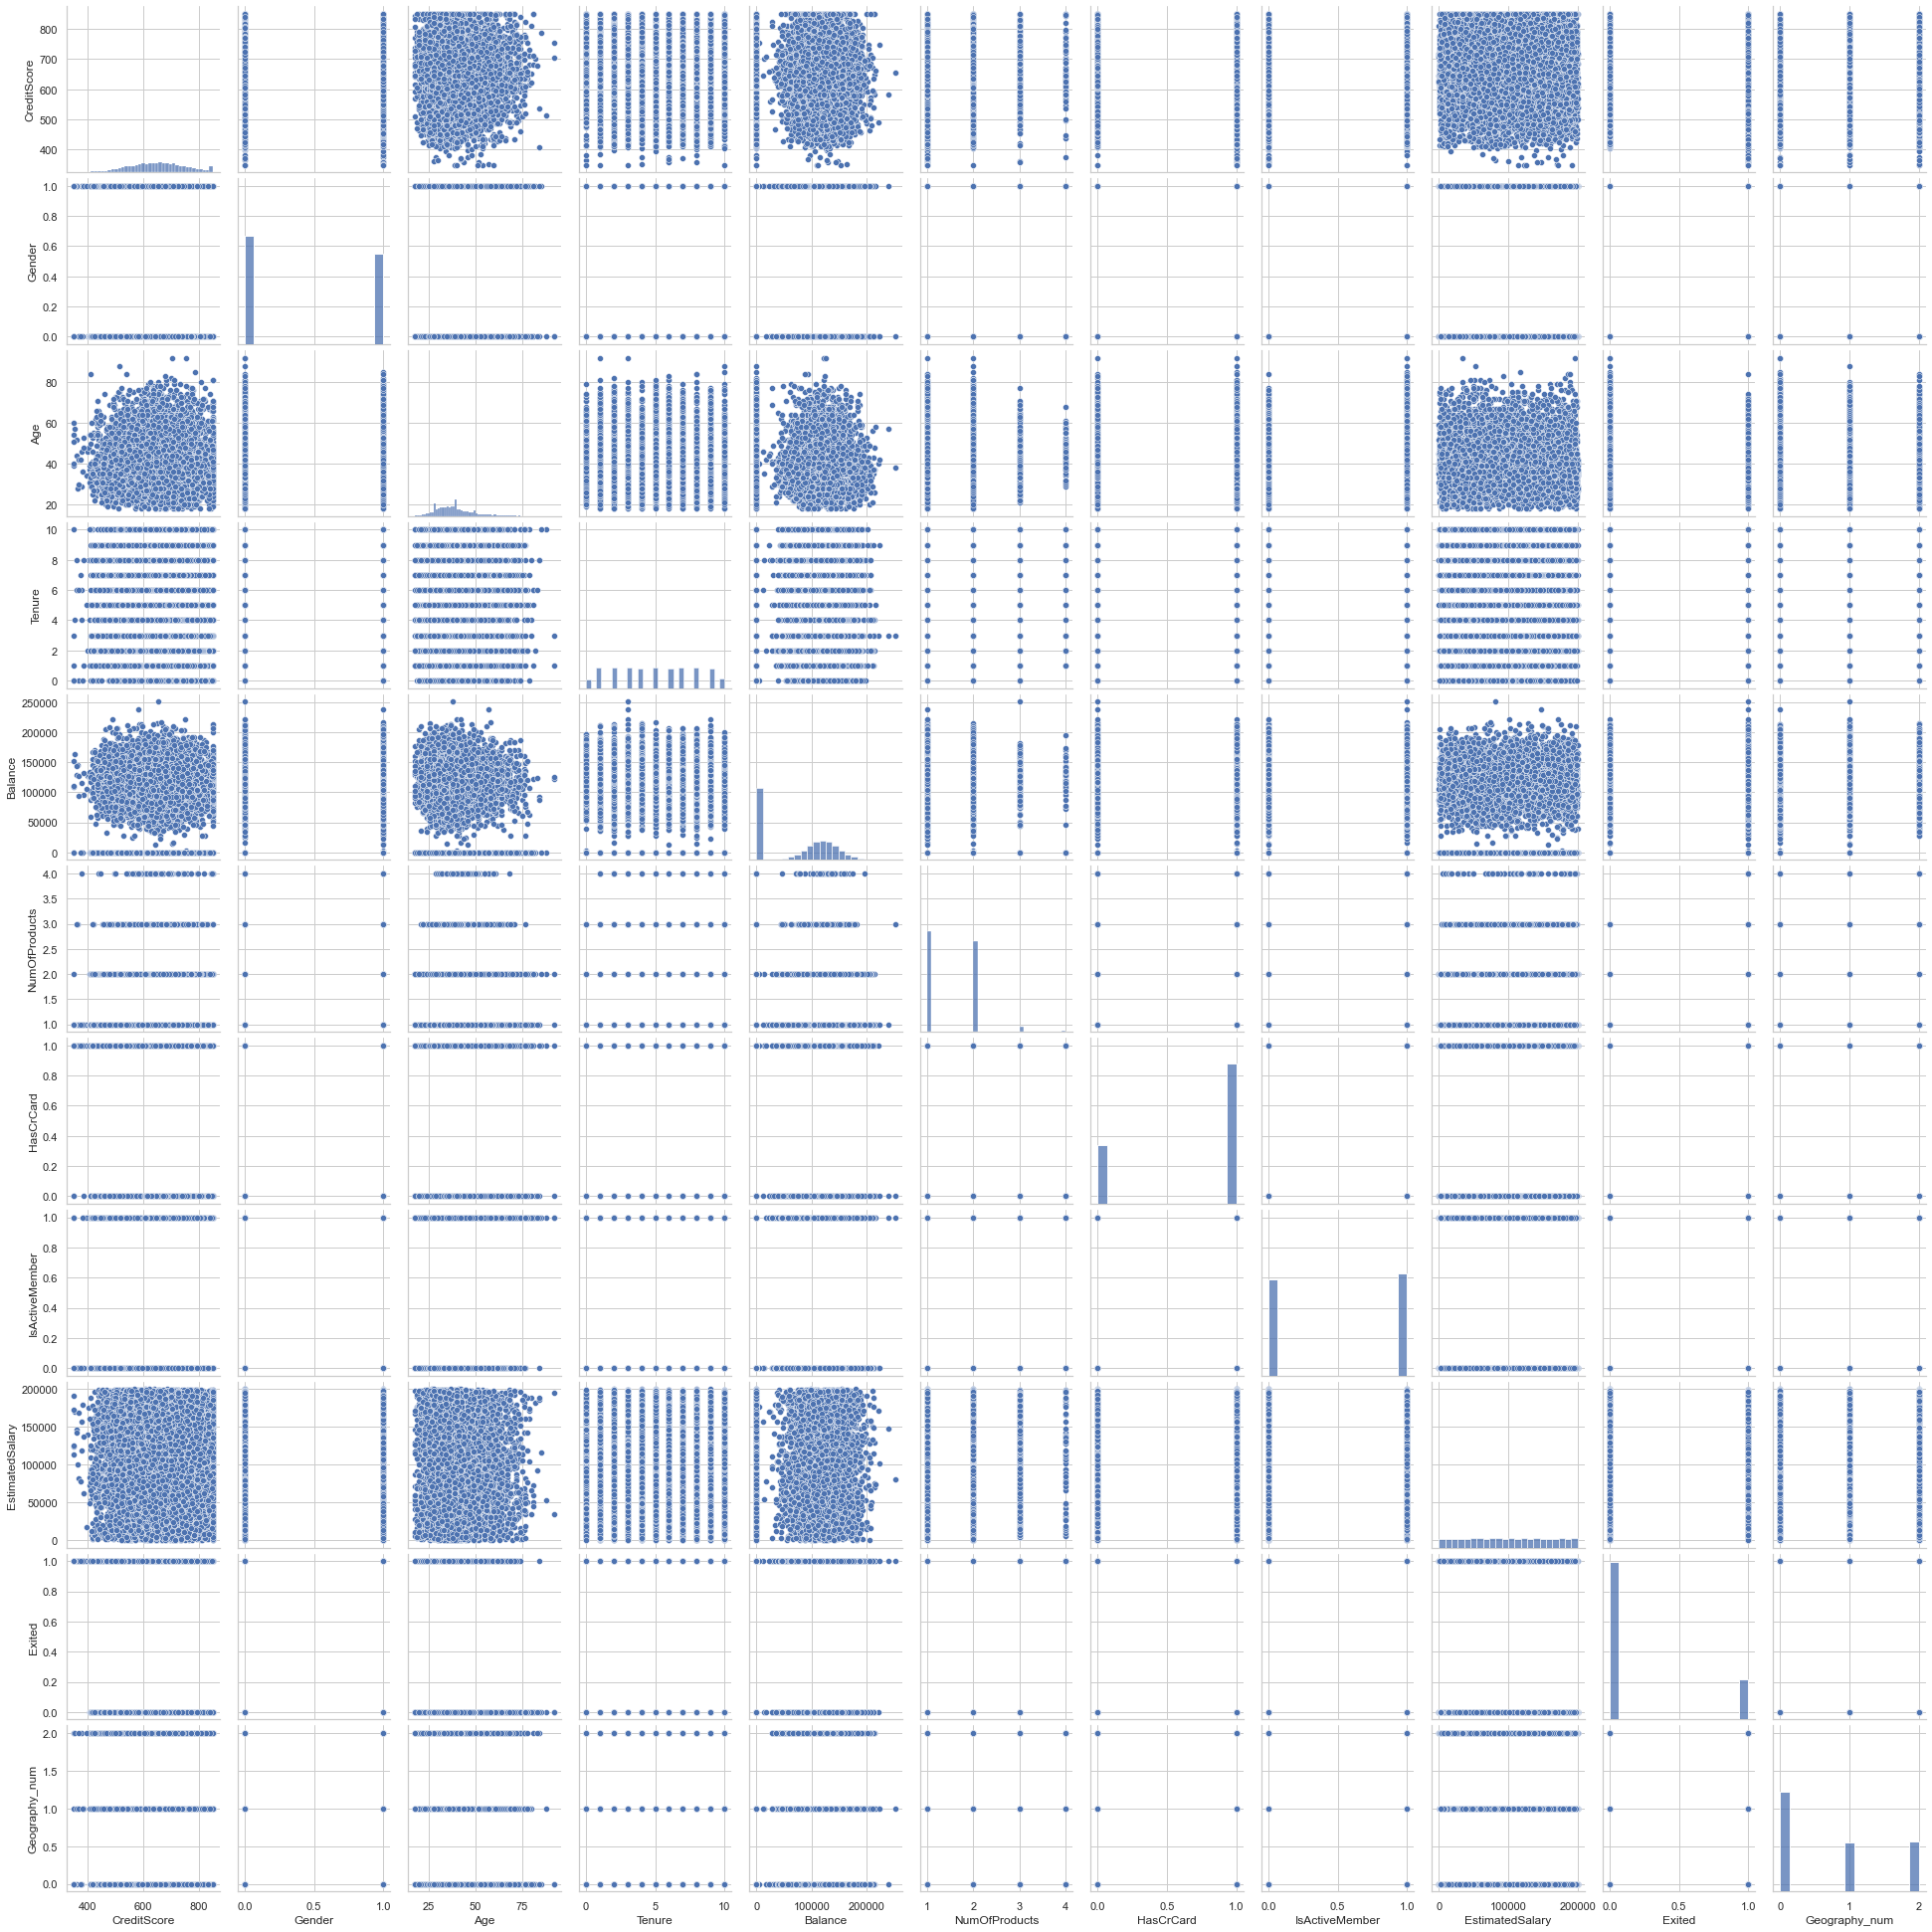

In [102]:
sns.pairplot(df[features_eda])

[Text(1, 0, 'EstimatedSalary'), Text(2, 0, 'Balance')]

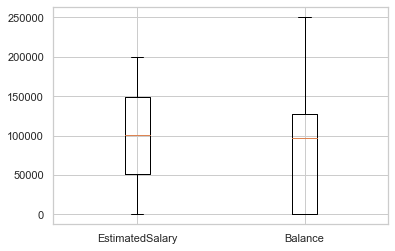

In [103]:
# два бокс-плота на одном графике - построение с помощью matplotlib
my_dict = {'EstimatedSalary': df['EstimatedSalary'], 'Balance': df['Balance']}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())

<AxesSubplot:xlabel='NumOfProducts', ylabel='EstimatedSalary'>

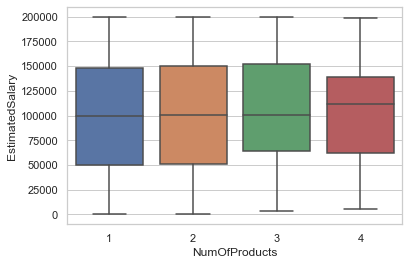

In [105]:
sns.boxplot(data=df, y="EstimatedSalary", x="NumOfProducts", hue="Exited")

<AxesSubplot:xlabel='NumOfProducts', ylabel='Balance'>

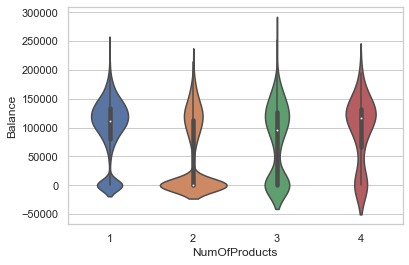

In [110]:
sns.violinplot(data=df, y="Balance", x="NumOfProducts")

In [111]:
# средний баланс в разрезе кол-ва продуктов
df.groupby('NumOfProducts')['Balance'].mean()

NumOfProducts
1    98551.870614
2    51879.145813
3    75458.328195
4    93733.135000
Name: Balance, dtype: float64

<AxesSubplot:xlabel='NumOfProducts'>

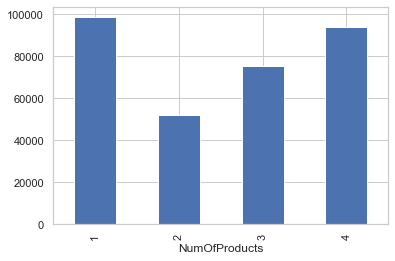

In [112]:
df.groupby('NumOfProducts')['Balance'].mean().plot.bar()

### Многомерный анализ признаков

In [113]:
# сводная таблица - средний баланс в разрезе стран и кол-ва продуктов
result = pd.pivot_table(data=df, index='Geography', columns='NumOfProducts', values='Balance')
result

NumOfProducts,1,2,3,4
Geography,,,,
France,90977.877896,31828.097047,50071.822500,71362.731379
Germany,119868.328139,119341.245038,121572.672396,121442.305417
Spain,90595.373063,32690.852688,48385.897121,91407.651429


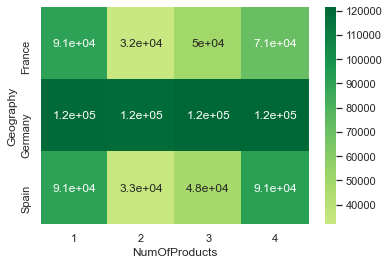

In [114]:
# тепловая карта баланса в разрезе стран и кол-ва продуктов
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

## Предварительная обработка данных (preprocessing)

Какие действия выполняются в процессе предварительной подготовки?
- преобразование типов данных 
- удаление выбросов
- заполнение пропусков

In [ ]:
df.info()

In [ ]:
# замена значений для указанного признака
df['Gender'].replace('Male', 0, inplace=True)
df['Gender'].replace('Female', 1, inplace=True)

In [ ]:
df['Gender'] = df['Gender'].astype('int64')

In [ ]:
# генерация бинарных колонок (фиктивных переменных) для категориального признака Geography
geography_cols = pd.get_dummies(df["Geography"])
geography_cols.head()

In [ ]:
# список имён признаков, которые будут использоваться для построения модели
features_names = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 
                  'IsActiveMember', 'EstimatedSalary']

In [ ]:
# объединение изначальных признаков и фиктивных бинарных признаков - формирование матрицы Объекты-признаки
X = pd.concat([df[features_names], geography_cols], axis = 1)
X.shape

In [ ]:
X.head()

In [ ]:
# выделение целевой переменной (таргета) в отдельный вектор
y = df['Exited']